In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: >

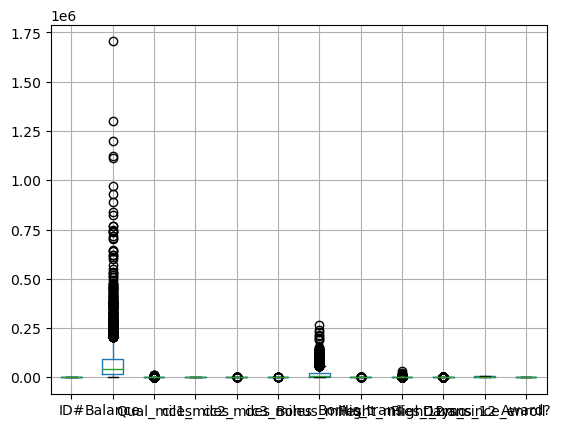

In [7]:
df.boxplot()

In [8]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-1.5*iqr
    upper_extreme=q3+1.5*iqr
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(["int","float"]):
    outlier_capping(df,col)

In [9]:
df.boxplot()

<Axes: >

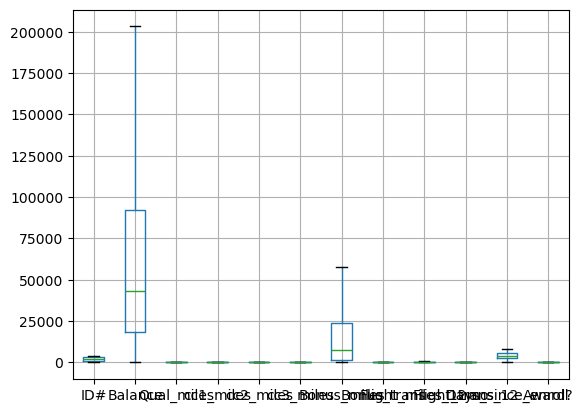

In [10]:
plt.show()

In [11]:
target=df[["Award?"]]
features=df.drop(columns=["Award?"])

In [12]:
target.head()

,Award?
0,0
1,0
2,0
3,0
4,1


In [13]:
features.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
minm=MinMaxScaler()

In [16]:
scaled_data=minm.fit_transform(features)

In [17]:
scaled_data

array([[0.00000000e+00, 1.38486237e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.43742464e-01],
       [2.48756219e-04, 9.46959865e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.39884254e-01],
       [4.97512438e-04, 2.03495002e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.47841813e-01],
       ...,
       [9.99502488e-01, 3.62156543e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.68796721e-01],
       [9.99751244e-01, 2.70147317e-01, 0.00000000e+00, ...,
        6.43086817e-01, 4.00000000e-01, 1.68676151e-01],
       [1.00000000e+00, 1.48411502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.68314444e-01]])

In [18]:
featured_data=pd.DataFrame(scaled_data,columns=features.columns)

In [19]:
featured_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.138486,0.0,0.00,0.0,0.0,0.003019,0.026316,0.000000,0.0,0.843742
1,0.000249,0.094696,0.0,0.00,0.0,0.0,0.003731,0.052632,0.000000,0.0,0.839884
2,0.000498,0.203495,0.0,0.00,0.0,0.0,0.071547,0.105263,0.000000,0.0,0.847842
3,0.000746,0.072710,0.0,0.00,0.0,0.0,0.008677,0.026316,0.000000,0.0,0.837955
4,0.000995,0.481019,0.0,0.75,0.0,0.0,0.751394,0.684211,1.000000,1.0,0.835905
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.090917,0.0,0.00,0.0,0.0,0.147936,0.105263,0.257235,0.4,0.168917
3995,0.999254,0.316826,0.0,0.00,0.0,0.0,0.017023,0.131579,0.000000,0.0,0.167953
3996,0.999502,0.362157,0.0,0.50,0.0,0.0,0.441587,0.210526,0.000000,0.0,0.168797
3997,0.999751,0.270147,0.0,0.00,0.0,0.0,0.008677,0.026316,0.643087,0.4,0.168676


In [20]:
corr=df.corr()
corr

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.269374,NaN,-0.224465,NaN,NaN,-0.210868,-0.156118,-0.083917,-0.082887,-0.964988,-0.177901
Balance,-0.269374,1.000000,NaN,0.446510,NaN,NaN,0.494422,0.409017,0.297045,0.295565,0.286143,0.170678
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.224465,0.446510,NaN,1.000000,NaN,NaN,0.912531,0.627786,0.098786,0.087618,0.230849,0.335457
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.210868,0.494422,NaN,0.912531,NaN,NaN,1.000000,0.663558,0.205801,0.193669,0.217320,0.394061
Bonus_trans,-0.156118,0.409017,NaN,0.627786,NaN,NaN,0.663558,1.000000,0.310543,0.308518,0.170308,0.337444
Flight_miles_12mo,-0.083917,0.297045,NaN,0.098786,NaN,NaN,0.205801,0.310543,1.000000,0.942734,0.095019,0.293119
Flight_trans_12,-0.082887,0.295565,NaN,0.087618,NaN,NaN,0.193669,0.308518,0.942734,1.000000,0.091898,0.300085


In [21]:
sns.heatmap(corr,annot=True)

<Axes: >

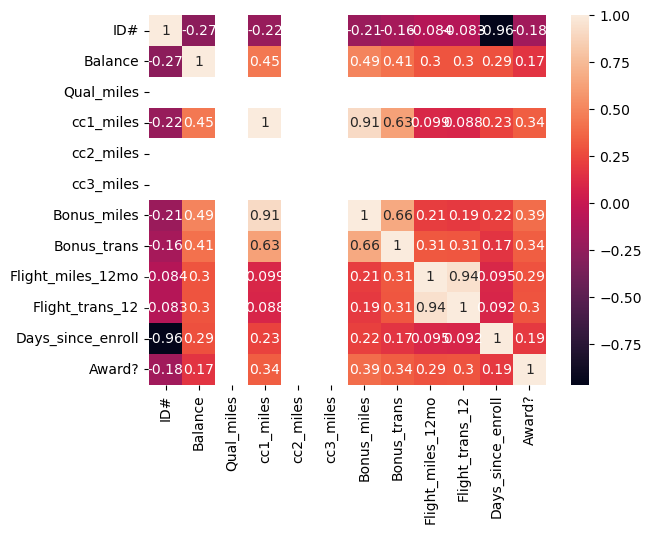

In [22]:
plt.show()

In [23]:
from sklearn.feature_selection import f_classif

In [24]:
f_class=f_classif(featured_data,target)

In [25]:
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind="bar")

<Axes: >

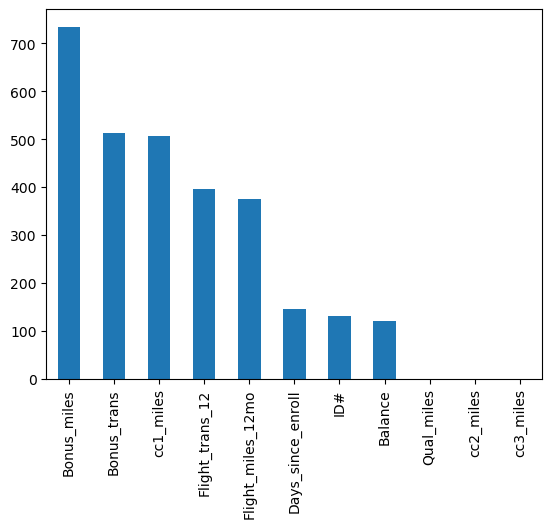

In [26]:
plt.show()

In [27]:
features1=featured_data.drop(columns=['Qual_miles','cc2_miles','cc3_miles'])

In [28]:
features1

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.138486,0.00,0.003019,0.026316,0.000000,0.0,0.843742
1,0.000249,0.094696,0.00,0.003731,0.052632,0.000000,0.0,0.839884
2,0.000498,0.203495,0.00,0.071547,0.105263,0.000000,0.0,0.847842
3,0.000746,0.072710,0.00,0.008677,0.026316,0.000000,0.0,0.837955
4,0.000995,0.481019,0.75,0.751394,0.684211,1.000000,1.0,0.835905
...,...,...,...,...,...,...,...,...
3994,0.999005,0.090917,0.00,0.147936,0.105263,0.257235,0.4,0.168917
3995,0.999254,0.316826,0.00,0.017023,0.131579,0.000000,0.0,0.167953
3996,0.999502,0.362157,0.50,0.441587,0.210526,0.000000,0.0,0.168797
3997,0.999751,0.270147,0.00,0.008677,0.026316,0.643087,0.4,0.168676


In [29]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA()
data=pca.fit_transform(scaled_data)

In [32]:
fea=pd.DataFrame(data,columns=features.columns)

In [33]:
fea

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.419836,0.073536,-0.725217,-0.095148,-0.082057,0.013962,0.001962,-0.056650,6.997683e-18,-6.250109e-18,-1.249673e-16
1,-0.426473,0.070652,-0.716815,-0.138679,-0.057564,0.015072,0.001858,-0.059195,7.308150e-18,-5.535671e-18,-1.293831e-16
2,-0.352179,0.124551,-0.701719,-0.053032,-0.022812,0.059294,-0.007757,-0.054102,-1.486430e-17,-6.390267e-18,-2.238537e-16
3,-0.438856,0.064421,-0.717110,-0.157001,-0.082930,0.020456,-0.000067,-0.059673,7.512185e-18,-8.016129e-18,-1.324092e-16
4,1.422552,-0.063884,-0.264735,-0.288250,0.016512,-0.001655,-0.001666,-0.070678,-4.181513e-18,1.213876e-18,2.358993e-16
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.303968,-0.494847,0.430248,-0.033021,-0.101094,0.055297,-0.110674,0.080700,-3.951504e-17,-1.321839e-17,-3.153699e-16
3995,-0.606166,-0.188089,0.393918,0.250430,-0.007231,-0.007496,0.012407,0.073955,1.093069e-17,-8.202846e-19,-9.105767e-17
3996,-0.226630,0.251341,0.632703,0.111395,-0.165208,-0.013797,0.005617,0.076060,1.244171e-17,-1.080889e-17,1.414278e-16
3997,-0.128752,-0.721917,0.378921,0.129381,-0.180556,0.001283,0.182683,0.072236,1.131421e-16,-2.632291e-17,2.380046e-16


In [34]:
features2=fea.drop(columns=['Qual_miles','cc2_miles','cc3_miles'])

In [35]:
features2

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.419836,0.073536,-0.095148,0.001962,-0.056650,6.997683e-18,-6.250109e-18,-1.249673e-16
1,-0.426473,0.070652,-0.138679,0.001858,-0.059195,7.308150e-18,-5.535671e-18,-1.293831e-16
2,-0.352179,0.124551,-0.053032,-0.007757,-0.054102,-1.486430e-17,-6.390267e-18,-2.238537e-16
3,-0.438856,0.064421,-0.157001,-0.000067,-0.059673,7.512185e-18,-8.016129e-18,-1.324092e-16
4,1.422552,-0.063884,-0.288250,-0.001666,-0.070678,-4.181513e-18,1.213876e-18,2.358993e-16
...,...,...,...,...,...,...,...,...
3994,-0.303968,-0.494847,-0.033021,-0.110674,0.080700,-3.951504e-17,-1.321839e-17,-3.153699e-16
3995,-0.606166,-0.188089,0.250430,0.012407,0.073955,1.093069e-17,-8.202846e-19,-9.105767e-17
3996,-0.226630,0.251341,0.111395,0.005617,0.076060,1.244171e-17,-1.080889e-17,1.414278e-16
3997,-0.128752,-0.721917,0.129381,0.182683,0.072236,1.131421e-16,-2.632291e-17,2.380046e-16


In [36]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([4.37952174e-01, 2.78103814e-01, 1.60838971e-01, 6.54316494e-02,
       3.33045601e-02, 1.09073735e-02, 1.03364430e-02, 3.12501430e-03,
       8.30947235e-18, 1.31820040e-18, 0.00000000e+00])

In [37]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance

array([0.43795217, 0.71605599, 0.87689496, 0.94232661, 0.97563117,
       0.98653854, 0.99687499, 1.        , 1.        , 1.        ,
       1.        ])

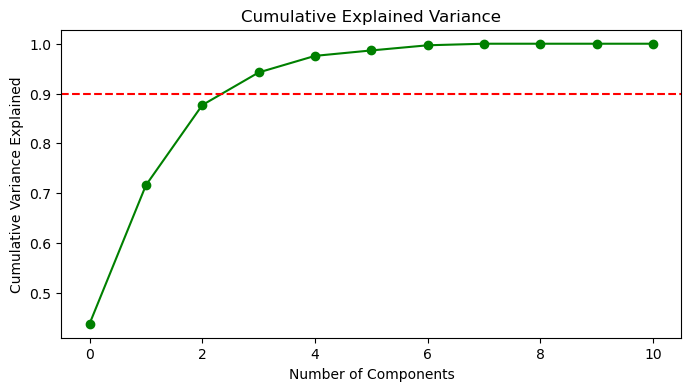

In [38]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='green')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [39]:
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90)+1
n_components_90

4

In [40]:
kmean=KMeans(n_clusters=4,random_state=42)

In [41]:
cluster=kmean.fit(features2)

In [42]:
cluster_label=kmean.labels_

In [43]:
silhouette_score=silhouette_score(features2,cluster_label)

In [44]:
silhouette_score

0.47852631594719225

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaled_features = StandardScaler().fit_transform(features2)



In [47]:
min_samples = 5

In [48]:
from sklearn.neighbors import NearestNeighbors

In [49]:
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(features2)
distances, indices = nbrs.kneighbors(features2)

In [50]:
distances = np.sort(distances[:, -1])

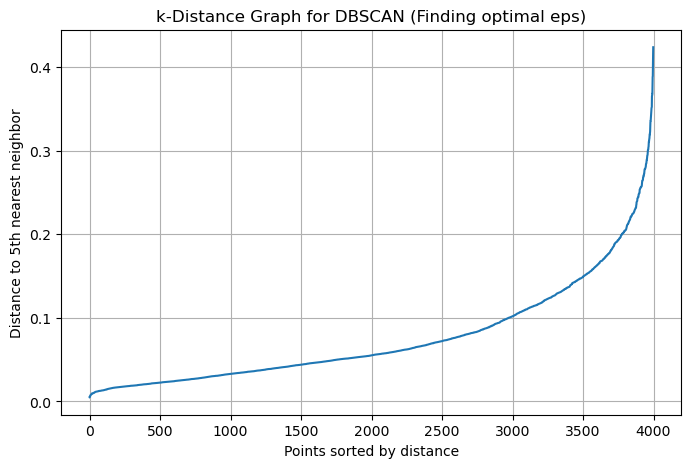

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("k-Distance Graph for DBSCAN (Finding optimal eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {min_samples}th nearest neighbor")
plt.grid(True)
plt.show()

In [52]:
## bending sharp side

In [53]:
eps_value=0.35

In [54]:
dbscan = DBSCAN(eps=eps_value,min_samples=min_samples)



In [55]:
clu=dbscan.fit(features2)

In [56]:
label=dbscan.labels_

In [58]:
sil_score=silhouette_score(features2,clu)

TypeError: 'numpy.float64' object is not callable

In [ ]:
## the two clusters kmeans and dbscan. by using kmeans i have found the clusters by for loop, and also found the score.it is 0.39 while using dbscan by using the loops found the eps values and found the score.it is 0.29

In [ ]:
sns.scatterplot(data=features1,x='ID#',y='cc1_miles',hue=labels)

In [ ]:
plt.show()

1. Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [ ]:
## K-Means assumes spherical, equal-sized clusters good for compact data.
## K-Means	High (> 0.5)	Clear, compact, and well-separated clusters
## Medium (0.25–0.5)	Some overlap between clusters
##	Low (< 0.25)	Poor separation or wrong number of clusters


## DBSCAN identifies arbitrary shapes and noise, so silhouette scores may drop even when clustering is logically correct,for DBSCAN,eps and min_samples carefully
##  DBSCAN	High (> 0.5)	Well-defined density-based clusters
##	Low or invalid	Too many points labeled as noise or parameters not optimal